In [ ]:
import pandas as pd
import numpy as np
Data = pd.read_csv("/content/Data-cleaning-for-beginners-using-pandas.csv")
df=pd.DataFrame(Data)

In [ ]:
#1MISSING VALUES
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        29 non-null     int64  
 1   Age          22 non-null     float64
 2   Salary       29 non-null     object 
 3   Rating       28 non-null     float64
 4   Location     29 non-null     object 
 5   Established  29 non-null     int64  
 6   Easy Apply   29 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ KB


In [ ]:
Data.columns = Data.columns.str.lower().str.replace(' ','_')



In [ ]:
Data.isna().sum()

index          0
age            0
salary         0
rating         1
location       0
established    0
easy_apply     0
dtype: int64

In [ ]:
#2DATATYPES
df.dtypes


index            int64
age            float64
salary          object
rating         float64
location        object
established      int64
easy_apply      object
dtype: object

<Axes: >

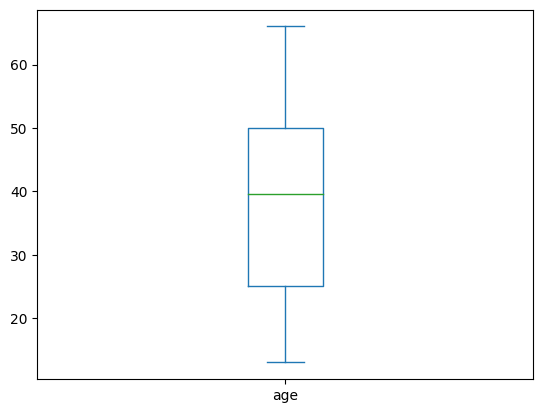

In [ ]:
#3OUTLIERS
import seaborn as sns
df.age.plot.box()

In [ ]:
df.age.describe()

count    22.000000
mean     39.045455
std      16.134781
min      13.000000
25%      25.000000
50%      39.500000
75%      50.000000
max      66.000000
Name: age, dtype: float64

In [ ]:
Q1=df.age.quantile(.25)
Q3=df.age.quantile(.75)
IQR= Q3-Q1
upper_bound= Q3+(1.5*IQR)
lower_bound=Q1-(1.5*IQR)
print(lower_bound,upper_bound)

-12.5 87.5


In [ ]:
df.age[df.age<14]

24    13.0
Name: age, dtype: float64

In [ ]:
#Treating outliers
df.loc[df.age > upper_bound,'age']=upper_bound
df.loc[df.age < lower_bound,'age']=lower_bound
print(df)

    index   age      salary  rating       location  established easy_apply
0       0  44.0   $44k-$99k     5.4       India,In         1999       TRUE
1       1  66.0   $55k-$66k     3.5    New York,Ny         2002       TRUE
2       2   NaN   $77k-$89k    -1.0    New York,Ny           -1         -1
3       3  64.0   $44k-$99k     4.4       India In         1988         -1
4       4  25.0   $44k-$99k     6.4  Australia Aus         2002         -1
5       5  44.0   $77k-$89k     1.4       India,In         1999       TRUE
6       6  21.0   $44k-$99k     0.0    New York,Ny           -1         -1
7       7  44.0   $44k-$99k    -1.0  Australia Aus           -1         -1
8       8  35.0   $44k-$99k     5.4    New York,Ny           -1         -1
9       9  22.0   $44k-$99k     7.7       India,In           -1       TRUE
10     10  55.0   $10k-$49k     5.4       India,In         2008       TRUE
11     11  44.0   $10k-$49k     6.7       India,In         2009         -1
12     12   NaN   $44k-$9

In [ ]:
#9Handling age distribution by replacing NaN values
avg_age = Data.age.mean()
df['age']

0     44.0
1     66.0
2      NaN
3     64.0
4     25.0
5     44.0
6     21.0
7     44.0
8     35.0
9     22.0
10    55.0
11    44.0
12     NaN
13    25.0
14    66.0
15    44.0
16    19.0
17     NaN
18    35.0
19    32.0
20     NaN
21    35.0
22    19.0
23     NaN
24    13.0
25    55.0
26     NaN
27    52.0
28     NaN
Name: age, dtype: float64

In [ ]:
#9Age Distibution
Data['age']=Data['age'].fillna(avg_age)
Data['age']=Data['age'].round(decimals=1)
Data['age'].astype('int')

0     44
1     66
2     39
3     64
4     25
5     44
6     21
7     44
8     35
9     22
10    55
11    44
12    39
13    25
14    66
15    44
16    19
17    39
18    35
19    32
20    39
21    35
22    19
23    39
24    13
25    55
26    39
27    52
28    39
Name: age, dtype: int64

In [ ]:
Data['age'].isna().sum()

0

In [ ]:
#8Handling rating by replacing negative values
Data['rating'].isna().sum()

1

In [ ]:
A=df['rating'] = df['rating'].replace(-1,np.nan)
df['rating']

0     5.4
1     3.5
2     NaN
3     4.4
4     6.4
5     1.4
6     0.0
7     NaN
8     5.4
9     7.7
10    5.4
11    6.7
12    0.0
13    NaN
14    4.0
15    3.0
16    4.5
17    5.3
18    6.7
19    3.3
20    5.7
21    5.0
22    7.8
23    2.4
24    NaN
25    0.0
26    NaN
27    5.4
28    3.4
Name: Rating, dtype: float64

In [ ]:
avg_rating = df.rating.mean()
print(avg_rating)

4.283333333333334


In [ ]:
df['rating']=df['rating'].fillna(avg_rating)
df['rating']=df['rating'].round(decimals=1)
#8Rating range
df['rating'].astype('int')

0     5
1     3
2     4
3     4
4     6
5     1
6     0
7     4
8     5
9     7
10    5
11    6
12    0
13    4
14    4
15    3
16    4
17    5
18    6
19    3
20    5
21    5
22    7
23    2
24    4
25    0
26    4
27    5
28    3
Name: Rating, dtype: int64

In [ ]:
#Handling Established by replacing negative values
df['established']

0     1999
1     2002
2       -1
3     1988
4     2002
5     1999
6       -1
7       -1
8       -1
9       -1
10    2008
11    2009
12    1999
13    2019
14    2020
15    1999
16    1984
17    1943
18    1954
19    1955
20    1944
21    1946
22    1988
23    1999
24    1987
25    1980
26    1934
27    1935
28    1932
Name: established, dtype: int64

In [ ]:
df['established'] = df['established'].replace(-1,np.nan)
df['established']

0     1999.0
1     2002.0
2        NaN
3     1988.0
4     2002.0
5     1999.0
6        NaN
7        NaN
8        NaN
9        NaN
10    2008.0
11    2009.0
12    1999.0
13    2019.0
14    2020.0
15    1999.0
16    1984.0
17    1943.0
18    1954.0
19    1955.0
20    1944.0
21    1946.0
22    1988.0
23    1999.0
24    1987.0
25    1980.0
26    1934.0
27    1935.0
28    1932.0
Name: established, dtype: float64

In [ ]:
median_established=df.established.median()
print(median_established)

1988.0


In [ ]:

df['established']=df['established'].fillna(median_established)
df['established']=df['established'].round(decimals=1)
df['established'].astype('int')

0     1999
1     2002
2     1988
3     1988
4     2002
5     1999
6     1988
7     1988
8     1988
9     1988
10    2008
11    2009
12    1999
13    2019
14    2020
15    1999
16    1984
17    1943
18    1954
19    1955
20    1944
21    1946
22    1988
23    1999
24    1987
25    1980
26    1934
27    1935
28    1932
Name: established, dtype: int64

In [ ]:
#4Salary formatting
Data['salary']

0      $44k-$99k
1      $55k-$66k
2      $77k-$89k
3      $44k-$99k
4      $44k-$99k
5      $77k-$89k
6      $44k-$99k
7      $44k-$99k
8      $44k-$99k
9      $44k-$99k
10     $10k-$49k
11     $10k-$49k
12     $44k-$99k
13     $44k-$99k
14     $44k-$99k
15    $88k-$101k
16     $19k-$40k
17     $44k-$99k
18     $44k-$99k
19     $44k-$99k
20     $44k-$99k
21     $44k-$99k
22     $55k-$66k
23     $44k-$99k
24     $44k-$99k
25     $44k-$99k
26     $55k-$66k
27     $44k-$99k
28     $39k-$88k
Name: Salary, dtype: object

In [ ]:
Data['salary'] = Data['salary'].apply(lambda x:x.replace('$',''))
Data['salary']

0      44k-99k
1      55k-66k
2      77k-89k
3      44k-99k
4      44k-99k
5      77k-89k
6      44k-99k
7      44k-99k
8      44k-99k
9      44k-99k
10     10k-49k
11     10k-49k
12     44k-99k
13     44k-99k
14     44k-99k
15    88k-101k
16     19k-40k
17     44k-99k
18     44k-99k
19     44k-99k
20     44k-99k
21     44k-99k
22     55k-66k
23     44k-99k
24     44k-99k
25     44k-99k
26     55k-66k
27     44k-99k
28     39k-88k
Name: salary, dtype: object

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [ ]:
#Local standardization
df.loc[df.location == 'Australia Aus','location'] = 'Australia,Aus'
df.loc[df.location == 'Newyork Ny','location'] = 'Newyork,Ny'
df.loc[df.location == 'India In', 'location'] = 'India,In'


In [ ]:
print(df)

    index   age      salary  rating       location  established easy_apply
0       0  44.0   $44k-$99k     5.4       India,In         1999       TRUE
1       1  66.0   $55k-$66k     3.5    New York,Ny         2002       TRUE
2       2  39.0   $77k-$89k    -1.0    New York,Ny           -1         -1
3       3  64.0   $44k-$99k     4.4       India,In         1988         -1
4       4  25.0   $44k-$99k     6.4  Australia,Aus         2002         -1
5       5  44.0   $77k-$89k     1.4       India,In         1999       TRUE
6       6  21.0   $44k-$99k     0.0    New York,Ny           -1         -1
7       7  44.0   $44k-$99k    -1.0  Australia,Aus           -1         -1
8       8  35.0   $44k-$99k     5.4    New York,Ny           -1         -1
9       9  22.0   $44k-$99k     7.7       India,In           -1       TRUE
10     10  55.0   $10k-$49k     5.4       India,In         2008       TRUE
11     11  44.0   $10k-$49k     6.7       India,In         2009         -1
12     12  39.0   $44k-$9

In [ ]:
#Easy Apply Transformation
df['easy_apply']

0     TRUE
1     TRUE
2       -1
3       -1
4       -1
5     TRUE
6       -1
7       -1
8       -1
9     TRUE
10    TRUE
11      -1
12      -1
13    TRUE
14    TRUE
15      -1
16      -1
17    TRUE
18    TRUE
19    TRUE
20    TRUE
21      -1
22    TRUE
23    TRUE
24      -1
25    TRUE
26    TRUE
27      -1
28      -1
Name: easy_apply, dtype: object

In [ ]:
df["easy_apply"].replace('-1', 0, inplace=True)
df["easy_apply"] = df["easy_apply"].astype("bool")
print(df)

    index   age    salary  rating       location  established  easy_apply
0       0  44.0   44k-99k     5.4       India,In       1999.0        True
1       1  62.0   55k-66k     3.5    New York,Ny       2002.0        True
2       2  39.0   77k-89k     4.3    New York,Ny       1988.0       False
3       3  62.0   44k-99k     4.4       India,In       1988.0       False
4       4  25.0   44k-99k     6.4  Australia,Aus       2002.0       False
5       5  44.0   77k-89k     1.4       India,In       1999.0        True
6       6  21.0   44k-99k     0.0    New York,Ny       1988.0       False
7       7  44.0   44k-99k     4.3  Australia,Aus       1988.0       False
8       8  35.0   44k-99k     5.4    New York,Ny       1988.0       False
9       9  22.0   44k-99k     7.7       India,In       1988.0        True
10     10  55.0   10k-49k     5.4       India,In       2008.0        True
11     11  44.0   10k-49k     6.7       India,In       2009.0       False
12     12  39.0   44k-99k     0.0     

In [ ]:
#10Handling special characters
print(df.location)

0          India,In
1       New York,Ny
2       New York,Ny
3          India,In
4     Australia,Aus
5          India,In
6       New York,Ny
7     Australia,Aus
8       New York,Ny
9          India,In
10         India,In
11         India,In
12         India,In
13    Australia,Aus
14    Australia,Aus
15    Australia,Aus
16         India,In
17      New York,Ny
18      New York,Ny
19      New York,Ny
20      New York,Ny
21      New York,Ny
22      New York,Ny
23      New York,Ny
24      New York,Ny
25    Australia,Aus
26         India,In
27         India,In
28    Australia,Aus
Name: location, dtype: object
